# Loading Ligand Networks from Orion or FEP+

OpenFE provides functions to load a ligand network from an [OpenEye Orion NES] `.dat` file or Schrödinger FEP+ `.edge` file. With this, we can create a network of transformations using their tools and then run the actual simulations with OpenFE.

[OpenEye Orion NES]: https://docs.eyesopen.com/floe/2021-2/modules/oemdaffinity/docs/source/tutorials/NES_tutorial.html

## Setup

In [1]:
%matplotlib inline

from rdkit import Chem

import openfe
from openfe.setup import ligand_network_planning

## Load the ligands

Both FEP+ `.edge` and Orion `.dat` files identify molecules by name, so to load the network OpenFE requires a list of named ligands. Load the ligands used by the network into instances of `SmallMoleculeComponent`. For more information, see [Loading Small Molecules]:

[Loading Small Molecules]: https://docs.openfree.energy/en/stable/cookbook/loading_molecules.html#loading-small-molecules

In [2]:
ligands = [
    openfe.SmallMoleculeComponent(mol) 
    for mol in Chem.SDMolSupplier(
        "assets/somebenzenes.sdf", 
        removeHs=False,
    )
]

## Select an atom mapper

Both formats encode only the network itself, leaving mappings between atoms in each edge undefined. OpenFE needs an atom mapper to produce atom mappings; for more information, see [Choose an Atom Mapper]:

[Choose an Atom Mapper]: https://docs.openfree.energy/en/stable/cookbook/generate_ligand_network.html#Choose-an-atom-mapper

In [3]:
mapper = openfe.setup.LomapAtomMapper(
    threed=True, # Use atom positions to prune symmetric mappings
    max3d=1.0, # Forbid mapping between atoms more than 1.0 Å apart
    element_change=False, # Forbid mappings that change an atoms element
)

## Load the network

Then, load the network into a `LigandNetwork`:

In [4]:
ligand_network = ligand_network_planning.load_orion_network(
    ligands=ligands,
    mapper=mapper,
    network_file="assets/somebenzenes_nes.dat",
)

# ligand_network = ligand_network_planning.load_fepplus_network(
#     ligands=ligands,
#     mapper=mapper,
#     network_file="assets/somebenzenes_fepp.edge",
# )

## Visualise the network

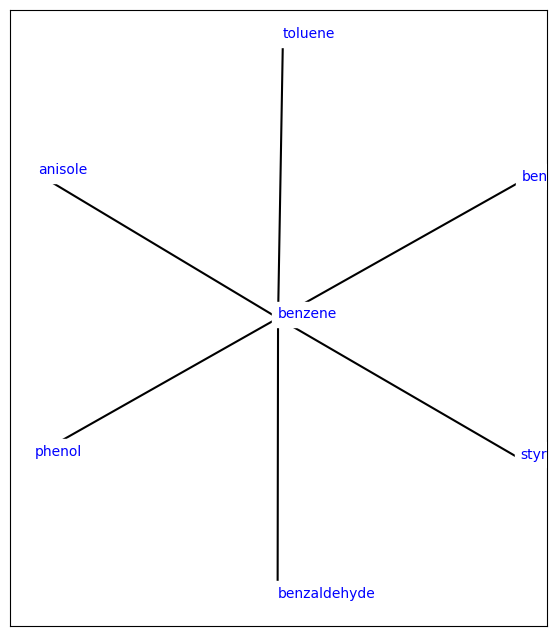

In [5]:
from openfe.utils.atommapping_network_plotting import plot_atommapping_network

plot_atommapping_network(ligand_network)